In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from keras.utils import to_categorical

from matplotlib import pyplot as plt
import tensorflow as tf

%matplotlib inline

In [10]:
data = load_digits()

In [51]:
X_data = data.data/16
y_data = to_categorical(data.target)
images = data.images
print(X.shape,y_data.shape,images.shape)

x = tf.placeholder(dtype=tf.float32,shape=(None,64))
y = tf.placeholder(dtype=tf.float32,shape=(None,10))
w = tf.Variable(tf.zeros([64,10]),dtype=tf.float32)
b = tf.Variable(tf.zeros([10]),dtype=tf.float32)

z = tf.matmul(x,w)
y_value = tf.matmul(x,w)+b
y_ = tf.nn.softmax(y_value)

loss = tf.reduce_sum(tf.square(y_ - y))
train_op = tf.train.GradientDescentOptimizer(0.0001).minimize(loss)

correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print('-'*30)
    for step in range(2000):
        sess.run(train_op,feed_dict={x:X_data,y:y_data})
        if step%200 == 0 :
            print("Loss : ",sess.run(loss,feed_dict={x:X_data,y:y_data}))
            print('Accuracy : ',sess.run(accuracy, feed_dict={x:X_data,y:y_data}))
            print('-'*30)
            #print(sess.run(b))
    #print(sess.run(w))

((1797, 64), (1797, 10), (1797, 8, 8))
------------------------------
('Loss : ', 1614.7441)
('Accuracy : ', 0.88035613)
------------------------------
('Loss : ', 761.20874)
('Accuracy : ', 0.835281)
------------------------------
('Loss : ', 423.7279)
('Accuracy : ', 0.9248748)
------------------------------
('Loss : ', 308.53308)
('Accuracy : ', 0.9410128)
------------------------------
('Loss : ', 253.18704)
('Accuracy : ', 0.9465776)
------------------------------
('Loss : ', 219.77286)
('Accuracy : ', 0.950473)
------------------------------
('Loss : ', 196.95953)
('Accuracy : ', 0.9538119)
------------------------------
('Loss : ', 180.19398)
('Accuracy : ', 0.95937675)
------------------------------
('Loss : ', 167.24481)
('Accuracy : ', 0.9627156)
------------------------------
('Loss : ', 156.87207)
('Accuracy : ', 0.96494156)
------------------------------


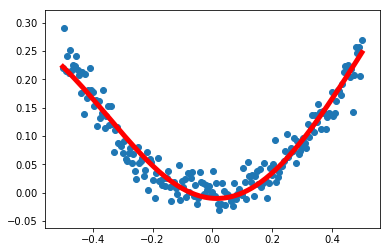

In [6]:
#使用numpy生成200个随机点
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise
#定义两个placeholder
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])
#定义神经网络中间层#1 代表输入值，10 代表10个神经元
Weights_L1 = tf.Variable(tf.random_normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
# 信号总和
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + biases_L1
# tanh双曲正切函数：将实数映射到[-1,1] 
L1 = tf.nn.tanh(Wx_plus_b_L1)
#定义神经网络输出层#10 代表10个神经元，1 代表1个输出层
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)
#二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))
#使用梯度下降法训练
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
with tf.Session() as sess: 
    #变量初始化 
    sess.run(tf.global_variables_initializer()) 
    for _ in range(2000): 
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
        #获得预测值 
        prediction_value = sess.run(prediction,feed_dict={x:x_data}) 
        #画图 
plt.figure()
plt.scatter(x_data,y_data) 
    # 'r-' 红色实线，lw 线宽为5 
plt.plot(x_data,prediction_value,'r-',lw=5) 
plt.show()

In [8]:
import tensorflow as tf
import numpy as np

# 使用 NumPy 生成假数据(phony data), 总共 100 个点.
x_data = np.float32(np.random.rand(2, 100)) # 随机输入
y_data = np.dot([0.100, 0.200], x_data) + 0.300
print(x_data.shape,y_data.shape)
# 构造一个线性模型
# 
b = tf.Variable(tf.zeros([1]))
W = tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0))
y = tf.matmul(W, x_data) + b

# 最小化方差
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# 初始化变量
init = tf.initialize_all_variables()

# 启动图 (graph)
sess = tf.Session()
sess.run(init)

# 拟合平面
for step in xrange(0, 201):
    sess.run(train)
    if step % 20 == 0:
        print step, sess.run(W), sess.run(b)



((2, 100), (100,))
0 [[0.40665066 0.06274813]] [0.4504812]
20 [[0.14165832 0.1519424 ]] [0.30388883]
40 [[0.10698013 0.18863961]] [0.30239484]
60 [[0.10091527 0.19706191]] [0.30107737]
80 [[0.10000866 0.19916174]] [0.3004373]
100 [[0.09993774 0.19973859]] [0.3001698]
120 [[0.09996397 0.19991279]] [0.3000645]
140 [[0.09998406 0.19996956]] [0.30002424]
160 [[0.09999356 0.19998908]] [0.30000907]
180 [[0.09999751 0.19999604]] [0.30000338]
200 [[0.09999906 0.19999857]] [0.30000123]
